# analyzing the risks and returns of a portfolio consisting of the tokens of  top 8 blockchains by TVL.

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy.stats import norm

In [19]:
start = dt.datetime(2023,3,23) #arb was listed this day
end = dt.datetime(2023,11,27)


top_8_tvl = ['ETH-USD', 'TRX-USD', 'BNB-USD', 'ARB11841-USD', 'MATIC-USD', 'OP-USD', 'AVAX-USD' , 'SOL-USD']
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

prices = yf.download(top_8_tvl, start, end)['Adj Close']
prices.rename(columns={'ARB11841-USD': 'ARB-USD'}, inplace=True)
prices

[*********************100%%**********************]  8 of 8 completed


,ARB-USD,AVAX-USD,BNB-USD,ETH-USD,MATIC-USD,OP-USD,SOL-USD,TRX-USD
Date,,,,,,,,
2023-03-23,1.331082,17.562937,329.837006,1816.405151,1.137024,2.488820,22.216778,0.065263
2023-03-24,1.272492,16.986759,322.359344,1752.044800,1.097398,2.266247,20.678856,0.063443
2023-03-25,1.224705,16.880116,322.673065,1743.764771,1.079204,2.178531,20.446646,0.063723
2023-03-26,1.283315,17.134026,328.888000,1775.676758,1.105598,2.266159,20.975519,0.064216
2023-03-27,1.162705,16.503172,310.949127,1715.460815,1.046971,2.069757,19.921675,0.063580
...,...,...,...,...,...,...,...,...
2023-11-22,1.020009,20.796759,236.136597,2064.425293,0.773533,1.737654,57.588558,0.101237
2023-11-23,1.016955,20.672449,233.765808,2062.210693,0.772937,1.820375,56.599369,0.102084
2023-11-24,1.049265,20.885729,232.900955,2081.152100,0.759969,1.798564,56.866440,0.104721


In [36]:
prices.describe()

,ARB-USD,AVAX-USD,BNB-USD,ETH-USD,MATIC-USD,OP-USD,SOL-USD,TRX-USD
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.093252,13.516004,256.731416,1807.396886,0.750890,1.595951,24.887196,0.079378
std,0.184390,3.386382,42.508868,134.930644,0.192698,0.372106,10.206374,0.010859
min,0.761060,8.787722,205.229416,1539.612427,0.503436,1.083253,14.486572,0.063443
25%,0.948019,10.510029,218.535843,1671.161865,0.576761,1.333606,20.036188,0.070951
50%,1.125679,13.081213,241.797501,1832.395996,0.693333,1.482226,21.484665,0.077349
75%,1.196796,15.536709,308.562378,1889.322388,0.887680,1.730628,24.432308,0.084648
max,1.698545,22.859646,348.220917,2120.561035,1.183862,2.713599,65.534401,0.108811


In [39]:
returns = prices.pct_change()
returns

,ARB-USD,AVAX-USD,BNB-USD,ETH-USD,MATIC-USD,OP-USD,SOL-USD,TRX-USD
Date,,,,,,,,
2023-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-24,-0.044017,-0.032806,-0.022671,-0.035433,-0.034851,-0.089429,-0.069223,-0.027887
2023-03-25,-0.037554,-0.006278,0.000973,-0.004726,-0.016579,-0.038705,-0.011229,0.004413
2023-03-26,0.047856,0.015042,0.019261,0.018301,0.024457,0.040223,0.025866,0.007737
2023-03-27,-0.093983,-0.036819,-0.054544,-0.033912,-0.053027,-0.086667,-0.050242,-0.009904
...,...,...,...,...,...,...,...,...
2023-11-22,0.064139,0.091991,0.042608,0.065748,0.055953,0.086065,0.107462,0.051857
2023-11-23,-0.002994,-0.005977,-0.010040,-0.001073,-0.000770,0.047605,-0.017177,0.008367
2023-11-24,0.031771,0.010317,-0.003700,0.009185,-0.016778,-0.011982,0.004719,0.025832


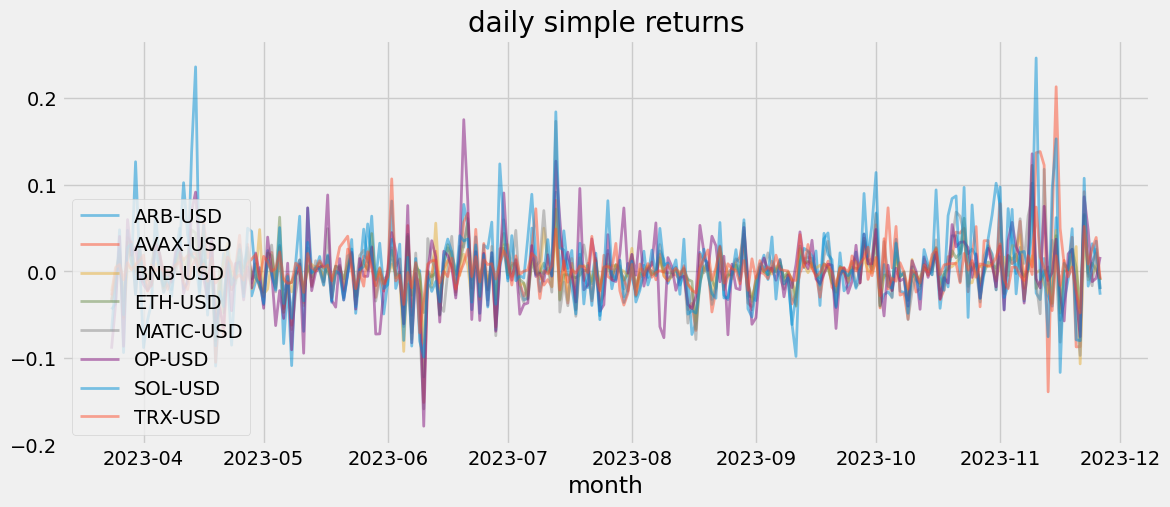

In [43]:
plt.figure(figsize=(12.5, 5))

for c in returns.columns.values:
  plt.plot(returns.index, returns[c], label = c, lw = 2, alpha = .5)

plt.title('daily simple returns')
plt.xlabel('month')
plt.legend(returns.columns.values, loc='lower left')
plt.show()

In [21]:
top_8_corr = top_8_returns.corr()
top_8_corr
#eth and arb have the highest correlation (0.733980), eth and matic are second-highest (0.711826)
#op and trx (tron) have the lowest correlation (0.355814)

,ARB-USD,AVAX-USD,BNB-USD,ETH-USD,MATIC-USD,OP-USD,SOL-USD,TRX-USD
ARB-USD,1.000000,0.534947,0.589946,0.733980,0.628829,0.683496,0.515716,0.418690
AVAX-USD,0.534947,1.000000,0.565581,0.537331,0.618187,0.534036,0.683504,0.440105
BNB-USD,0.589946,0.565581,1.000000,0.652544,0.668350,0.532891,0.545678,0.438088
ETH-USD,0.733980,0.537331,0.652544,1.000000,0.711826,0.639638,0.579725,0.461282
MATIC-USD,0.628829,0.618187,0.668350,0.711826,1.000000,0.643811,0.636693,0.464524
OP-USD,0.683496,0.534036,0.532891,0.639638,0.643811,1.000000,0.474957,0.355814
SOL-USD,0.515716,0.683504,0.545678,0.579725,0.636693,0.474957,1.000000,0.517012
TRX-USD,0.418690,0.440105,0.438088,0.461282,0.464524,0.355814,0.517012,1.000000


<Axes: >

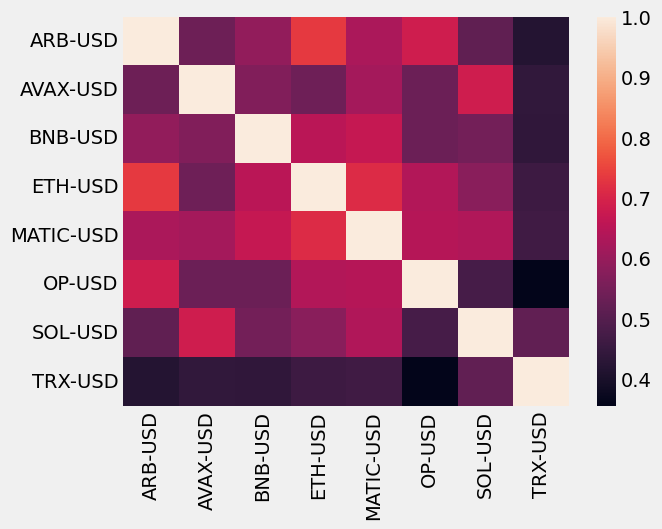

In [44]:
sns.heatmap(top_8_corr)

In [46]:
avg_returns = returns.mean()
avg_returns

ARB-USD     -0.000160
AVAX-USD     0.001444
BNB-USD     -0.001191
ETH-USD      0.000759
MATIC-USD   -0.001027
OP-USD      -0.000420
SOL-USD      0.004810
TRX-USD      0.002194
dtype: float64

In [49]:
covariance = returns.cov()
covariance

,ARB-USD,AVAX-USD,BNB-USD,ETH-USD,MATIC-USD,OP-USD,SOL-USD,TRX-USD
ARB-USD,0.001722,0.000838,0.000517,0.000678,0.000890,0.001176,0.000954,0.000319
AVAX-USD,0.000838,0.001426,0.000451,0.000452,0.000796,0.000836,0.001151,0.000305
BNB-USD,0.000517,0.000451,0.000446,0.000307,0.000482,0.000467,0.000514,0.000170
ETH-USD,0.000678,0.000452,0.000307,0.000496,0.000541,0.000590,0.000575,0.000189
MATIC-USD,0.000890,0.000796,0.000482,0.000541,0.001163,0.000910,0.000968,0.000291
OP-USD,0.001176,0.000836,0.000467,0.000590,0.000910,0.001718,0.000878,0.000271
SOL-USD,0.000954,0.001151,0.000514,0.000575,0.000968,0.000878,0.001987,0.000423
TRX-USD,0.000319,0.000305,0.000170,0.000189,0.000291,0.000271,0.000423,0.000337


In [50]:
variance = np.dot(weights.T, np.dot(covariance, weights))
variance

0.000674526127691374

In [51]:
volatility = np.sqrt(variance)
volatility

0.025971640835560892

In [54]:
simple_annual_return = np.sum(returns.mean() * weights) * 252
simple_annual_return

0.20184910774947276

In [59]:
#risk and expected annual return
risk = str(round(volatility, 2) * 100) + '%'
expected_annual_return = str(round(simple_annual_return, 2) * 100) + '%'

print("annual risk: ", risk)
print("expected annual return: ", expected_annual_return)

annual risk:  3.0%
expected annual return:  20.0%


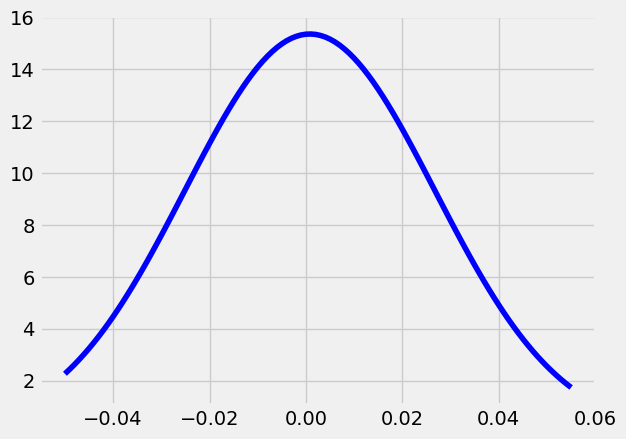

In [58]:
mean_return = avg_returns @ weights
stdev = np.sqrt(weights.T @ covariance @ weights)

x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, mean_return, stdev)

plt.plot(x, norm_dist, color = "b")
plt.show()

In [34]:
confidence_level = 0.05

VaR= norm.ppf(confidence_level, mean_return, stdev)
VaR

-0.04191855910343795